In [9]:
import preprocessing # import a python file for English text preprocessing
import semantic_na # import a python file for semantic network analysis
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

NUM_WORDS = 10

In [10]:
with open('nytimes.txt', 'r', encoding='utf8') as f:
    content = f.read()

In [11]:
customized_stopwords = ['be', 'today', 'yesterday', 'new', 'york', 'time']  # 직접 만든 불용어 사전

In [12]:
filtered_content, final_words = preprocessing.En_processing(content, customized_stopwords)
print(final_words)
c = Counter(final_words)
print(c.most_common(NUM_WORDS))

['hurray', 'hotblack', 'coffee', 'cafe', 'toronto', 'wifi', 'customer', 'cafe', 'city', 'location', 'café', 'grumpy', 'hotblacks', 'reason', 'blackout', 'cause', 'hosanna', 'president', 'jimson', 'bienenstock', 'aim', 'customer', 'device', 'vibe', 'vehicle', 'interaction', 'commodity', 'idea', 'bienenstock', 'science', 'decade', 'interaction', 'contributor', 'health', 'longevity', 'evidence', 'value', 'connection', 'morning', 'walk', 'woman', 'swim', 'locker', 'room', 'ymca', 'use', 'device', 'locker', 'room', 'experience', 'friend', 'share', 'joy', 'woman', 'problem', 'board', 'advice', 'counsel', 'laugh', 'brightens', 'day', 'study', 'life', 'harvard', 'health', 'watch', 'dozen', 'study', 'people', 'relationship', 'family', 'friend', 'community', 'health', 'problem', 'longer', 'study', 'men', 'woman', 'county', 'calif', 'lisa', 'berkman', 'leonard', 'syme', 'people', 'others', 'nineyear', 'study', 'people', 'tie', 'robbins', 'book', 'health', 'longevity', 'difference', 'survival', 'p

[' Hurray for the HotBlack Coffee cafe in Toronto for declining to offer WiFi to its customers', 'There are other such cafes to be sure including seven of the eight New York City locations of Café Grumpy', 'But its HotBlacks reason for the electronic blackout that is cause for hosannas', 'As its president Jimson Bienenstock explained his aim is to get customers to talk with one another instead of being buried in their portable devices', 'Its about creating a social vibe he told a New York Times reporter', 'Were a vehicle for human interaction otherwise its just a commodity', 'What a novel idea', ' Perhaps Mr Bienenstock instinctively knows what medical science has been increasingly demonstrating for decades Social interaction is a critically important contributor to good health and longevity', 'Personally I dont need researchbased evidence to appreciate the value of making and maintaining social connections', 'I experience it daily during my morning walk with up to three women then bef

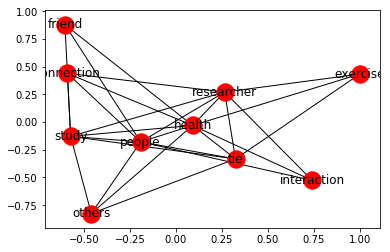

In [13]:
g = semantic_na.do_sna(filtered_content, final_words, NUM_WORDS)
nx.write_graphml(g, 'sna_test1.graphml')
nx.draw_networkx(g)
plt.show()

In [6]:
nx.betweenness_centrality(g)

{'connection': 0.0,
 'exercise': 0.0,
 'friend': 0.0,
 'health': 0.20370370370370372,
 'interaction': 0.0,
 'others': 0.0,
 'people': 0.11574074074074071,
 'researcher': 0.0810185185185185,
 'study': 0.060185185185185175,
 'tie': 0.039351851851851846}

In [7]:
nx.degree_centrality(g)

{'connection': 0.4444444444444444,
 'exercise': 0.3333333333333333,
 'friend': 0.3333333333333333,
 'health': 1.0,
 'interaction': 0.3333333333333333,
 'others': 0.4444444444444444,
 'people': 0.8888888888888888,
 'researcher': 0.7777777777777777,
 'study': 0.7777777777777777,
 'tie': 0.6666666666666666}

In [8]:
nx.closeness_centrality(g)

{'connection': 0.6428571428571429,
 'exercise': 0.6,
 'friend': 0.6,
 'health': 1.0,
 'interaction': 0.6,
 'others': 0.6428571428571429,
 'people': 0.9,
 'researcher': 0.8181818181818182,
 'study': 0.8181818181818182,
 'tie': 0.75}

In [14]:
g.nodes()

NodeView(('health', 'people', 'researcher', 'study', 'tie', 'interaction', 'friend', 'others', 'exercise', 'connection'))

In [16]:
for node in g.nodes():
    print('{0}은 {1}개의 단어와 연결되어 있습니다'.format(node, g.degree(node)))
    print(list(g.neighbors(node)))

health은 9개의 단어와 연결되어 있습니다
['interaction', 'friend', 'study', 'people', 'tie', 'others', 'researcher', 'connection', 'exercise']
people은 8개의 단어와 연결되어 있습니다
['health', 'friend', 'study', 'tie', 'others', 'researcher', 'connection', 'interaction']
researcher은 7개의 단어와 연결되어 있습니다
['tie', 'exercise', 'study', 'health', 'connection', 'people', 'interaction']
study은 7개의 단어와 연결되어 있습니다
['health', 'friend', 'people', 'tie', 'others', 'researcher', 'connection']
tie은 6개의 단어와 연결되어 있습니다
['study', 'others', 'health', 'people', 'researcher', 'exercise']
interaction은 3개의 단어와 연결되어 있습니다
['health', 'researcher', 'people']
friend은 3개의 단어와 연결되어 있습니다
['health', 'study', 'people']
others은 4개의 단어와 연결되어 있습니다
['study', 'tie', 'health', 'people']
exercise은 3개의 단어와 연결되어 있습니다
['tie', 'researcher', 'health']
connection은 4개의 단어와 연결되어 있습니다
['researcher', 'study', 'health', 'people']
